# Homework 1
Author: Muhammad Khalid

In [63]:
import numpy as np
import pandas as pd

## Question 1

In [64]:
### Part A
def minkowski(x, p, k):
    return np.sum(np.abs(x-p) ** k) ** (1/k)

### Part B
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])

# maximum coordinate-wise difference is 3
for i in range(1, 10):
    print(minkowski(x1, x2, i))

### Part C
x = np.array([1, 1.5, 0.5])
p = np.array([0, 0, 0])
k = 1
while abs(minkowski(x, p, k)-1.5) >= 0.001:
    k += 1

9.0
5.196152422706632
4.3267487109222245
3.9482220388574776
3.737192818846552
3.6028108655280078
3.5097924382760604
3.441608071319631
3.389492891729259


## Question 2

<Axes: ylabel='Frequency'>

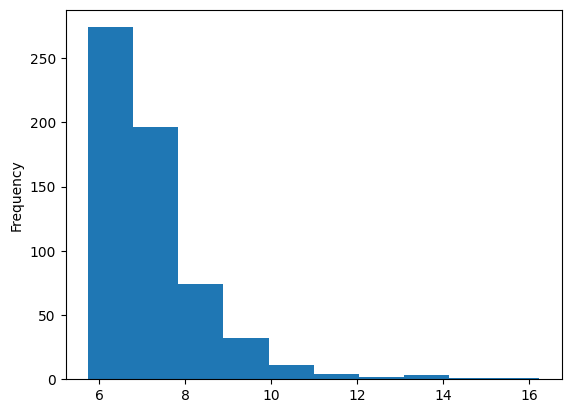

In [65]:
### Part A
from pathlib import Path
dir_path = Path("/Users/muhammadkhalid/Desktop/f2025/STA395/intro/hw1-data/timeseries")
lane_departures_key = pd.read_csv("https://remiller1450.github.io/data/lane_departures_key.csv")
df_list = []
for fname in dir_path.iterdir():
    temp = pd.read_csv(str(fname))
    df_list.append(temp)

lane_departures = pd.concat(df_list, ignore_index=True)

### Part B
final_departures = pd.merge(lane_departures, lane_departures_key, left_on=lane_departures.columns[0], right_on=lane_departures_key.columns[0], how='inner')

### Part C
max_abs_lat_distances = final_departures.groupby(['daqname', 'instance'])['lat_dist'].apply(lambda x: x.abs().max())

### Part D
max_abs_lat_distances.plot.hist()

## Question 3

In [66]:
### Part A
# obs 1 - 3
# obs 2 - 2
# obs 3 - 3.16
# obs 4 - 2.24
# obs 5 - 1.41
# obs 6 - 1.73

### Part B
# If we use k=1, we only consider the class of the nearest neighbor. From the previous calculation we know 
# that the closest point using uniform weighting is 1.41 whose class is Green. Therefore, our predicted 
# class will be green.

### Part C
# For k=3 and uniform weighting, we pick the 3 closest neighbors i.e. obs 5, 6, 2. Out of these only 
# one is Green which means the predicted probability would be 1/3.

### Part D
# Yes, it would be higher because distance weighting tends to give more important to points that are close by 
# compared to uniform weighting which gives equal preference to all points. Since Obs. 5 is the closest point
# and is green, it will have a disproportionately larger imapact than the other 2 closest points which are red.

### Part E
# Means:
#   X_1 - 1/3
#   X_2 - 1
#   X_3 - 1.167

# StdDevs
# X_1 - 0.94
# X_2 - 1
# X_3 - 1.06

# Standardized table values
# obs 1:  −0.35, 2, -1.10
# obs 2:  1.77, -1, -1.10
# obs 3:  −0.35, 0, 1.73
# obs 4:  −0.35, 0, 0.79
# obs 5:  −1.41, -1, −0.16
# obs 6:  0.69, 0, −0.16

# Standardized test value
# {−0.35, -1, −1.10}

# Distances
# obs 1 - 3
# obs 2 - 2.12
# obs 3 - 3
# obs 4 - 2.14
# obs 5 - 1.41
# obs 6 - 1.72

# Obs 2, 5, 6 are still the closest to the standardized test data point. 
# The predicted probability that the data point is green is 1/3 because 
# there's only one Green point out of the 3 closest data points

## Question 4

Text(0, 0.5, 'RMSE')

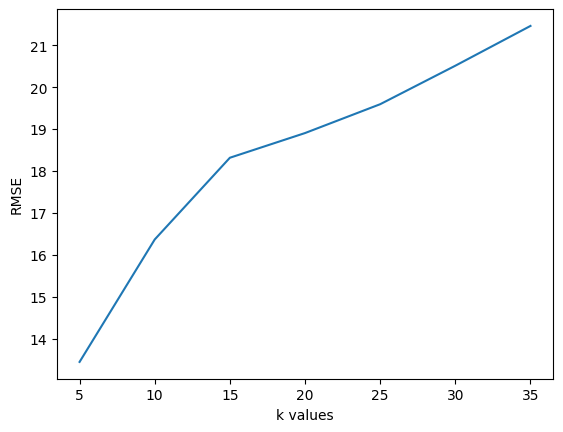

In [67]:
### Part A
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

ozone = pd.read_csv("https://remiller1450.github.io/data/Ozone.csv")

# Split the data
oz_train, oz_test = train_test_split(ozone, test_size=0.2, random_state=3)
oz_train_y = oz_train['Ozone']
oz_train_X = oz_train.select_dtypes("number").drop(['Ozone', 'Day'], axis=1)
oz_test_X = oz_test.select_dtypes("number").drop(['Ozone', 'Day'], axis=1)
oz_test_y = oz_test['Ozone']

def pipeline(k):
    knn_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor(n_neighbors=k))
    ])
    knn_model = knn_pipeline.fit(oz_train_X, oz_train_y)
    return np.sqrt(mean_squared_error(oz_train_y, knn_model.predict(oz_train_X)))

### Part B
rmse_values = []

for i in range(5, 36, 5):
    rmse_values.append(pipeline(i))

plt.plot(range(5, 36, 5), rmse_values)
plt.xlabel("k values")
plt.ylabel("RMSE")


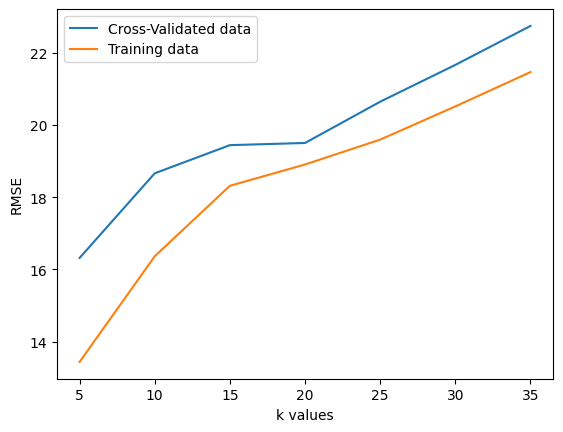

In [68]:
### Part C
from sklearn.model_selection import GridSearchCV

# Same as in part B
q4c_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])

my_params = {
    'scaler': [StandardScaler()],
    'model__n_neighbors': range(5, 36, 5)
    }

grid_results = GridSearchCV(
    q4c_pipeline,
    my_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
).fit(oz_train_X, oz_train_y)
params_to_print = ['rank_test_score', 'param_model__n_neighbors', 'mean_test_score']
cv_results = pd.DataFrame(grid_results.cv_results_).sort_values(by='rank_test_score')[params_to_print]
cv_results["mean_test_score"] = abs(cv_results["mean_test_score"])

plt.plot(cv_results["param_model__n_neighbors"], cv_results["mean_test_score"], label="Cross-Validated data")
plt.plot(range(5, 36, 5), rmse_values, label="Training data")
plt.xlabel("k values")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [69]:
### Part D
from sklearn.tree import DecisionTreeRegressor
q4_pipeline = Pipeline([
    ("model", DecisionTreeRegressor())
])

my_params = {'model__max_depth': list(range(2, 7)), 'model__min_samples_split': list(range(2, 7))}

grid_results = GridSearchCV(
    q4_pipeline,
    my_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
).fit(oz_train_X, oz_train_y)
dt_best_params = grid_results.best_params_

print("Best hyperparameters:", grid_results.best_params_)
print("Cross-validated RMSE:", -grid_results.best_score_)


Best hyperparameters: {'model__max_depth': 3, 'model__min_samples_split': 2}
Cross-validated RMSE: 20.361309124618007


In [70]:
### Part E
q4e_knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=knn_best_params['model__n_neighbors']))
])
final_fitted_knn = q4e_knn_pipeline.fit(oz_train_X, oz_train_y)
print(f"KNN: {np.sqrt(mean_squared_error(oz_test_y, final_fitted_knn.predict(oz_test_X)))}")

q4e_dt_pipeline = Pipeline([
    ("model", DecisionTreeRegressor(max_depth=dt_best_params['model__max_depth'], min_samples_split=dt_best_params['model__min_samples_split']))
])
final_fitted_dt = q4e_dt_pipeline.fit(oz_train_X, oz_train_y)
print(f"Decision tree: {np.sqrt(mean_squared_error(oz_test_y, final_fitted_dt.predict(oz_test_X)))}")

### Part E
# I recommend the Decision Tree. Even though the KNN model achieved greater accuracy on 
# the test set, interpreting a decision tree is much easier. A decision tree essentially 
# converts the entire process into a number of "if-else" statements in a flowchart like 
# diagram which the planner could use to understand why the model made the decisions it 
# made at each node.


KNN: 15.974980438172686
Decision tree: 19.155868246702475
